In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [0]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28X28X1 (black/white)


T = tf.placeholder(tf.float32, [None, 10])  

In [0]:
# 1번째 컨볼루션 층
W2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 2번째 컨볼루션 층, 3X3X32 개 필터
W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 32 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 32
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 7X7 크기를 가진 64개의 activation map을 flatten 시킴
A3_flat = P3_flat = tf.reshape(A3, [-1, 7*7*32])

In [0]:
# 출력층
W4 = tf.Variable(tf.random_normal([7*7*32, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z4, 즉 softmax 에 들어가는 입력 값
Z4 = logits = tf.matmul(A3_flat, W4) + b4    # 선형회귀 값 Z4

y = A4 = tf.nn.softmax(Z4)

In [0]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z4, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [0]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A4, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A4, 1)

In [11]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 100 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.9115894
epochs =  0 , step =  100 , loss_val =  0.98685867
epochs =  0 , step =  200 , loss_val =  0.53891706
epochs =  0 , step =  300 , loss_val =  0.4815405
epochs =  0 , step =  400 , loss_val =  0.2759106
epochs =  0 , step =  500 , loss_val =  0.19478565
epochs =  1 , step =  0 , loss_val =  0.22804813
epochs =  1 , step =  100 , loss_val =  0.09696249
epochs =  1 , step =  200 , loss_val =  0.06451018
epochs =  1 , step =  300 , loss_val =  0.04389954
epochs =  1 , step =  400 , loss_val =  0.1187175
epochs =  1 , step =  500 , loss_val =  0.08694203
epochs =  2 , step =  0 , loss_val =  0.089399755
epochs =  2 , step =  100 , loss_val =  0.11906373
epochs =  2 , step =  200 , loss_val =  0.048755113
epochs =  2 , step =  300 , loss_val =  0.024307437
epochs =  2 , step =  400 , loss_val =  0.10604084
epochs =  2 , step =  500 , loss_val =  0.10037061
epochs =  3 , step =  0 , loss_val =  0.045691766
epochs =  3 , step =  100 , loss_val = 

In [12]:
# index_label_prediction_list
print(index_label_prediction_list)

[[115, 4, 9], [211, 5, 3], [247, 4, 6], [259, 6, 0], [321, 2, 7], [340, 5, 3], [445, 6, 0], [449, 3, 5], [582, 8, 2], [583, 2, 7], [619, 1, 8], [646, 2, 1], [659, 2, 1], [813, 9, 8], [895, 0, 8], [947, 8, 9], [1014, 6, 5], [1039, 7, 2], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 5], [1319, 8, 0], [1393, 5, 3], [1520, 7, 2], [1527, 1, 5], [1641, 5, 6], [1709, 9, 5], [1790, 2, 7], [1901, 9, 4], [1903, 7, 2], [1982, 6, 8], [2035, 5, 3], [2053, 4, 9], [2070, 7, 9], [2098, 2, 0], [2118, 6, 0], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2185, 0, 8], [2195, 7, 2], [2293, 9, 2], [2406, 9, 4], [2454, 6, 5], [2462, 2, 0], [2488, 2, 4], [2578, 7, 2], [2597, 5, 3], [2654, 6, 1], [2720, 9, 4], [2770, 3, 7], [2836, 4, 2], [2896, 8, 0], [2930, 5, 1], [2939, 9, 5], [2953, 3, 5], [3030, 6, 0], [3060, 9, 7], [3073, 1, 2], [3336, 5, 7], [3441, 7, 2], [3457, 1, 6], [3520, 6, 4], [3534, 4, 8], [3558, 5, 0], [3597, 9, 3], [3727, 8, 9], [3742, 3, 9], [3751, 7, 2], [3762, 6, 8], [3806, 

In [13]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요
drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
100 image is saved now
110 image is saved now
120 image is saved now
Elapsed save time =>  0:01:06.899797
Total  124  data is saved


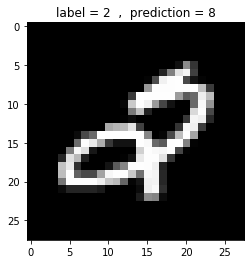

In [14]:
# check false data
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()

# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'CNN_example3_'
save_dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

os.chdir(colab_default_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)